# Graphical exploratory data analysis
> A Summary of lecture "Statistical Thinking in Python (Part 1)", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Data_Science, Statistics]
- image: images/iris-swarmplot.png

In [1]:
import pandas as pd
import numpy as np

## Introduction to Exploratory Data Analysis
### Exploratory data analysis
- The process of organizing, plotting, and summarizing a dataset
> Note: "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." - John Tukey

## Plotting a histogram

### Seaborn
- An excellent Matplotlib-based statistical data visualization package written by Michael Waskom

### Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is [available as part of scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array versicolor_petal_length.

In the video, Justin plotted the histograms by using the pandas library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for plt.show()) to the dummy variable _. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a ; after your plotting statements to achieve the same effect. Justin prefers using _. Therefore, you will see it used in the solution code.

In [2]:
df = pd.read_csv('./dataset/iris.csv')
renamed_columns = ['sepal length (cm)', 'sepal width (cm)', 
                   'petal length (cm)', 'petal width (cm)', 'species']
df.columns = renamed_columns
versicolor_petal_length = df[df['species'] == 'Versicolor']['petal length (cm)']
setosa_petal_length = df[df['species'] == 'Setosa']['petal length (cm)']
virginica_petal_length = df[df['species'] == 'Virginica']['petal length (cm)']

(array([ 1.,  2.,  3.,  2.,  8.,  7.,  6., 10.,  7.,  4.]),
 array([3.  , 3.21, 3.42, 3.63, 3.84, 4.05, 4.26, 4.47, 4.68, 4.89, 5.1 ]),
 <a list of 10 Patch objects>)

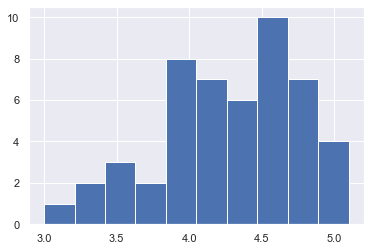

In [3]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of vesicolor petal length
plt.hist(versicolor_petal_length)

### Axis labels!
In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using ```plt.xlabel()``` and ```plt.ylabel()```. Don't forget to add units and assign both statements to ```_```. The packages ```matplotlib.pyplot``` and ```seaborn``` are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

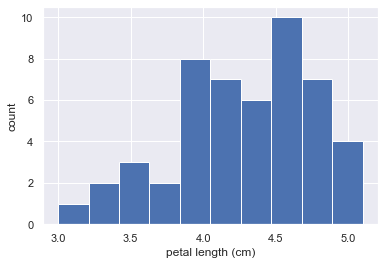

In [4]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

### Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the ```bins``` keyword argument of ```plt.hist()```.

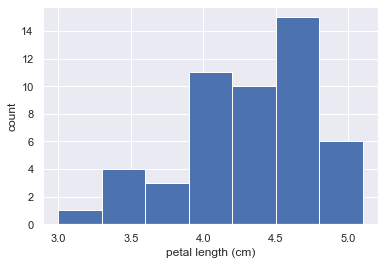

In [5]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer
n_bins = n_bins.astype('int')

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

## Plot all of your data: Bee swarm plots
### Binning bias
- The same data may be interpreted differently depending on choice of bins

### Bee swarm plot
Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths.

For your reference, the code Justin used to create the bee swarm plot in the video is provided below:
```python
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```
In the IPython Shell, you can use ```sns.swarmplot?``` or ```help(sns.swarmplot)``` for more details on how to make bee swarm plots using seaborn.

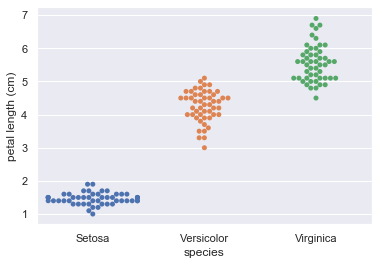

In [6]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.savefig('../images/iris-swarmplot.png')

## Plot all of your data: ECDFs {% fn 1 %}
{{ 'Empirical Cumulative Distribution Function' | fndetail: 1}}


### Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, ```foo(x,y)``` according to the following skeleton:
```python
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```
The function foo() above takes two arguments a and b and returns two values x and y. The function header ```def foo(a,b):``` contains the function signature ```foo(a,b)```, which consists of the function name, along with its parameters. 

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

### Plotting the ECDF
You will now use your ```ecdf()``` function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ```ecdf()``` function returns two arrays so you will need to unpack them. An example of such unpacking is ```x, y = foo(data)```, for some function ```foo()```.

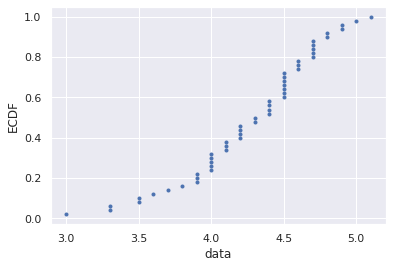

In [10]:
# Compute ECDF for versicolor data: x_vars, y_vars
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('data')
_ = plt.ylabel('ECDF')

### Comparison of ECDFs
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use ```plt.plot()``` three times, once for each ECDF. Remember to include ```marker='.'``` and ```linestyle='none'``` as arguments inside ```plt.plot()```.

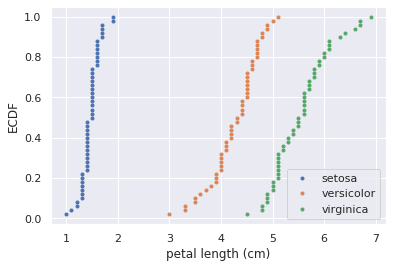

In [17]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')